In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# import os
import re
# import math
import time
# import timeit

import sounddevice as sd
from scipy.io import wavfile
# import IPython.display as ipd
# import soundfile as sf

from multiprocess import Pool
import functools
import pdb

import sys
sys.path.insert(1, './functions')

from workflow import *
from read import *
from similarity import *
from helper import *
from display import *

In [ ]:

import sounddevice as sd
from scipy.io import wavfile
# import IPython.display as ipd
# import soundfile as sf

from multiprocess import Pool
import functools
import pdb

import sys
sys.path.insert(1, './functions')

from workflow import *
from read import *
from similarity import *
from helper import *
from display import *

In [ ]:
# import session_info
# session_info.show()

In [ ]:
sd.query_devices()
# sd.default.device = 3

In [ ]:
samplerate, piano_audio = read_audio('demov2.wav')

In [ ]:
sd.play(piano_audio, samplerate)

In [ ]:
sd.stop()

In [ ]:
# Testing the above similarity score with different snippets of different playthroughs that "should" have a good score

midiPath = 'ladispute.txt'
notes = midi_to_timeseries(midiPath)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# matches=[]
for x in range(5000,10000,500):
#     print(x)
#     x = 0
    for y in range(5000,50000,2000):
        t1 = [y+x,0+x] # timestamps in ms
        t2 = [191400+y+x,191400+x]
#         t2 = [413000+y+x,413000+x]
#         t2 = [587000+y+x,587000+x]

        tf1 = time_to_sequence(notes, t1)
        tf2 = time_to_sequence(notes, t2)

        a,b,c,d,score = two_way_similarity(tf1,tf2,zero_penalty=1,length_incentive=500000,max_offset=600,min_dist_const=400,disp=True)
        print(score)
#         matches.append([x,y,score])
        ax.scatter(x,y,score)
        if score<0.8:
            print("  Oops")
#             a,b,c,d,score = two_way_similarity(tf1,tf2,zero_penalty=1,length_incentive=500000,max_offset=600,min_dist_const=400,disp=True)
#             display_snippet_plot(notes, time_to_index(notes,t1[0]),time_to_index(notes,t1[1]),time_to_index(notes,t2[0]),time_to_index(notes,t2[1]), score, t1[0], t2[0])
    #         play_match(piano_audio, t1[0],t1[1],t2[0],t2[1])
    #         predict(notes, time_to_index(notes,t1[0]), time_to_index(notes,t1[1]), time_to_index(notes,t2[0]),time_to_index(notes,t2[1]), tf1[-1][0],pred_time=100,sound=True)
    #         time.sleep(2)
#         break
#     break

# plt.scatter3D(matches)
ax.set_xlabel('Start position (ms)')
ax.set_ylabel('Length of snip (ms)')
ax.set_zlabel('Score')
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# import os
import re
# import math
import time
# import timeit

import sounddevice as sd
from scipy.io import wavfile
# import IPython.display as ipd
# import soundfile as sf

from multiprocess import Pool
import functools
import pdb

import sys
sys.path.insert(1, './functions')

from workflow import *
from read import *
from similarity import *
from helper import *
from display import *

In [4]:
# Setting up parameters to run the matching algorithm

midiPath = './midi-recordings/ladispute.txt'
notes = midi_to_timeseries(midiPath)

# hyperparameters
zero_penalty = 1
length_incentive = 500000 # 50 seconds yields 10% increase in score
max_offset = 600
timestamp_max_before_source = 5000 #ms behing the source timestamp
min_dist_const = 400 # acceptable time difference for same note
initial_alignment = "last note in source to match in target"
realignment = "mean offset of notes within max_offset dist - done once"
note_scoring = "penalize within min_dist"

# parameters
minNotes = 8
maxNotes = 100 # max length of snippet to be calculated
minTime = 1500 # min time in ms
maxTime = 30000 # if more matches, increase snippet length
thresh = 0.7
start = 191400
skip = 10
# end = 191430
end = 365000
n = 3
k = 1000
permutation = [(randint(0, sys.maxsize), randint(0, sys.maxsize)) for i in range(128)]

hashed_notes = get_notes_hashes(notes[:,1], n, permutation, minNotes, maxNotes)

# fm = functools.partial(find_matches_at_timestamp, n=n, k=k, permutation=permutation, hashed_notes=hashed_notes, notes=notes, minNotes=minNotes, minTime=minTime, maxNotes=maxNotes, 
#                        maxTime=maxTime, thresh=thresh, timestamp_max_before_source=timestamp_max_before_source, 
#                        zero_penalty=zero_penalty, length_incentive=length_incentive, max_offset=max_offset, 
#                        min_dist_const=min_dist_const, disp=False)

# sims_arr = find_matches_at_timestamp(i=25000,n=n, k=k, permutation=permutation, hashed_notes=hashed_notes, notes=notes, minNotes=minNotes, minTime=minTime, maxNotes=maxNotes, 
#                        maxTime=maxTime, thresh=thresh, timestamp_max_before_source=timestamp_max_before_source, 
#                        zero_penalty=zero_penalty, length_incentive=length_incentive, max_offset=max_offset, 
#                        min_dist_const=min_dist_const, disp=False)

# Running with time allocation to functions - analyse speed and bottlenecks
# %prun sims_arr.extend(find_matches_at_timestamp(25000, notes, minNotes, minTime, maxNotes, maxTime, thresh, disp=False))


In [ ]:
# Running match algorithm serially with target time following

# start_time = datetime.datetime.now()

sims_arr = [[]]
curr_times = np.arange(start, end, skip)
# curr_times = [start+10000]
# num_speedups = 0

for i in curr_times:
    sims_arr.append(find_matches_at_timestamp(i,n=n, k=k, permutation=permutation, hashed_notes=hashed_notes, notes=notes, minNotes=minNotes, minTime=minTime, maxNotes=maxNotes, 
                       maxTime=maxTime, thresh=thresh, timestamp_max_before_source=timestamp_max_before_source, 
                       zero_penalty=zero_penalty, length_incentive=length_incentive, max_offset=max_offset, 
                       min_dist_const=min_dist_const, disp=False))

sarr = []
for i in range(len(sims_arr)):
    sarr.extend(sims_arr[i])

# end_time = datetime.datetime.now()
# timedelta = end_time-start_time
# runtime = timedelta.total_seconds()
# print("Ran in {:.2f} seconds, or {:.2f} minutes".format(runtime, runtime/60))

In [10]:
source_id_start = 795
source_id_end = 787
# target_id_start = 689
# target_id_end = 547

In [8]:
time_to_index(notes, curr_times[0]-191400)

38

In [55]:
print(notes[source_id_end][0]-notes[source_id_start][0])
print(notes[target_id_end][0]-notes[target_id_start][0])

-22169
-21896


In [11]:
sample = notes[source_id_end:source_id_start][:,1]
sample

array([55, 58, 58, 55, 70, 51, 58, 55])

In [12]:
len_of_notes = len(sample)
source_hash = get_hash(sample, n, len_of_notes, permutation)[0]
target_hash = hashed_notes[len_of_notes - minNotes][:source_id_end]
indices = get_k_highest_scores(target_hash, source_hash, k)
scores = [1 - cosine(source, source_hash) for source in target_hash]

In [19]:
indices[:10]

[786, 785, 760, 2, 758, 0, 1, 759, 784, 761]

In [20]:
notes[30:38][:,1],notes[source_id_end:source_id_start][:,1], notes[2:10][:,1]

(array([58, 55, 55, 58, 70, 51, 55, 58]),
 array([55, 58, 58, 55, 70, 51, 58, 55]),
 array([55, 58, 58, 55, 70, 51, 55, 58]))

In [50]:
scores[147], scores[547]

(0.5716657941707142, 0.6257660380965593)

In [ ]:
source_id_start = 758
source_id_end = 750
two_way_similarity(notes[source_id_end:source_id_start], notes[547:758],zero_penalty=zero_penalty,length_incentive=length_incentive,max_offset=max_offset,min_dist_const=min_dist_const,disp=True)


In [68]:
# for x in indices:
#     if x > 740: continue
#     lm1,lm2,mo1,mo2,score = two_way_similarity(notes[source_id_end:source_id_start], notes[x:x+8],zero_penalty=zero_penalty,length_incentive=length_incentive,max_offset=max_offset,min_dist_const=min_dist_const,disp=True)
#     if score > 0.5:
#         print(x, score)
notes[source_id_end:source_id_start][:,1], notes[547:758][:,1]
np.where(notes[:,1] == 48)[0]




In [34]:
notes[:,1][1244:1244+8]

array([48, 51, 55, 60, 55, 51, 51, 87])

In [30]:
notes[:,1][675:675+8]

array([79, 79, 55, 67, 55, 79, 84, 48])

In [ ]:
# display_snippet_plot_2(notes[source_id_end:source_id_start],notes[675:675+8],notes[source_id_start][0],notes[675+8][0],score=0,time_ratio=1)
display_snippet_plot(notes, source_id_start, source_id_end, 287, 287-8, 0, notes[source_id_start][0]-20500, notes[287][0])
two


In [ ]:
source_hash = get_hash(sample, n, len_of_notes, permutation)[0]
len(source_hash)

In [ ]:
target_hash = hashed_notes[len_of_notes - minNotes][:source_id_end]
len(target_hash)

In [ ]:
from scipy.spatial.distance import cosine
scores = [1 - cosine(source, source_hash) for source in target_hash]

In [ ]:
scores[749]

In [ ]:
indices = get_k_highest_scores(target_hash, source_hash, k)

In [ ]:
# Running match algorithm parallely

fm(25000)

sims_arr = []
curr_times = np.arange(start, end, skip)

with Pool(4) as p:
    sims_arr = p.map(fm, curr_times)

# storing matches as array of all matches
sarr = []
for i in range(len(sims_arr)):
    sarr.extend(sims_arr[i])

In [4]:
# simsDF_1 = simsDF_old
# simsDFall_1 = simsDFall_old
# simsDF_2 = simsDF_old
# simsDFall_2 = simsDFall_old
# simsDF_old = simsDF
# simsDFall_old = simsDFall
curr_times = np.arange(start, end, skip)
for i in curr_times:
    print(find_matches_at_timestamp(i,n=n, k=k, permutation=permutation, hashed_notes=hashed_notes, notes=notes, minNotes=minNotes, minTime=minTime, maxNotes=maxNotes, 
                       maxTime=maxTime, thresh=thresh, timestamp_max_before_source=timestamp_max_before_source, 
                       zero_penalty=zero_penalty, length_incentive=length_incentive, max_offset=max_offset, 
                       min_dist_const=min_dist_const, disp=False))

i: 191400   source_id_start:758, source_id_end:750, target_id_start:689, target_id_end:547
source_id_start:758, source_id_end:750, target_id_start:690, target_id_end:548
returning [[191400, 178584, 0.57679350625, 758, 750, 758, 547], [191400, 178754, 0.6304624474999999, 758, 750, 758, 548]]
[[1.91400000e+05 1.78584000e+05 5.76793506e-01 7.58000000e+02
  7.50000000e+02 7.58000000e+02 5.47000000e+02 8.00000000e+00
  2.18950000e+04]
 [1.91400000e+05 1.78754000e+05 6.30462447e-01 7.58000000e+02
  7.50000000e+02 7.58000000e+02 5.48000000e+02 8.00000000e+00
  2.18950000e+04]]


In [8]:
type(sarr)

list

In [9]:
## choosing only significant scores and storing the new data in sims_plot

# sarr = np.array(sims_arr)
sarr = np.array(sarr)
sims_thresh = sarr * (sarr>thresh) # considering a match if score greater than a threshold

simsDF = pd.DataFrame(data=sims_thresh.copy(), columns=['source_timestamp', 'target_timestamp','score','source_id_start','source_id_end','target_id_start','target_id_end','match_len','match_time'])
simsDFall = pd.DataFrame(data=sarr.copy(), columns=['source_timestamp', 'target_timestamp','score','source_id_start','source_id_end','target_id_start','target_id_end','match_len','match_time'])


In [ ]:
sims_thresh

<Axes: title={'center': 'All matches >0.7, for \nMin Notes=8 notes, Max Notes=100'}, xlabel='source_timestamp', ylabel='target_timestamp'>

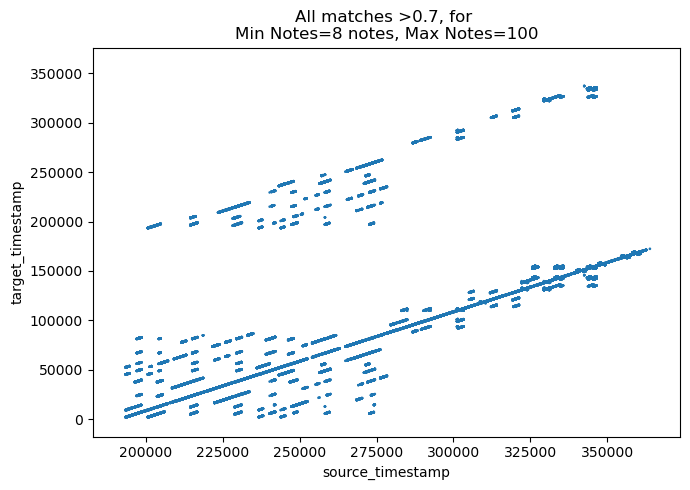

In [10]:
# plotting all mathes > threshold score

plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True

title = "All matches >"+str(thresh)+", for \nMin Notes=" + str(minNotes) + " notes, Max Notes=" + str(maxNotes)
simsDF.plot.scatter(x="source_timestamp", y="target_timestamp", s='score', title=title)


Percentage matches found: 100.0%
Percentage matches >0.7 found: 93.1%
Percentage matches within 50ms of line: 58.4%
Percentage matches >0.7 and within 50ms of the line: 57.0%
Minimum score of a "right match": 0.43


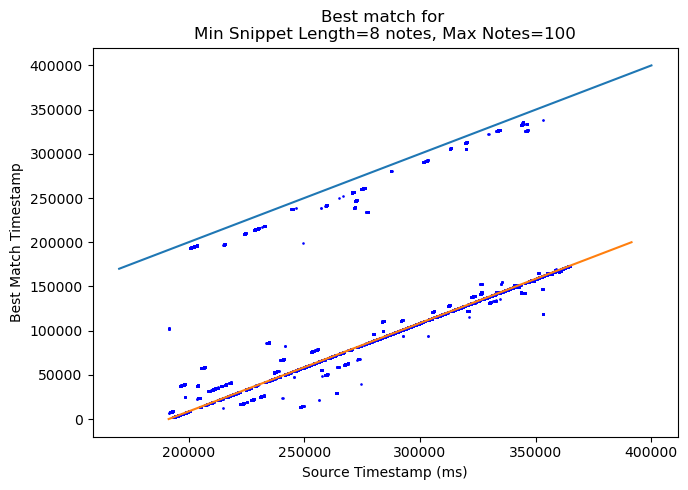

In [11]:
# Plotting best match only

percentage_matches_any = 0
percentage_matches_thresh = 0
percentage_matches_line = 0
percentage_matches_thresh_line = 0
acc = 50                            #ms accuracy for distance from line

plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True
bestMatches = []

toPlot = simsDFall
# toPlot = simsDFall_old

total = 0
distribution_hist = []
distribution_all = []
close_matches = []
min_good_score = 1
for x in range(start,end,skip):
    y = toPlot.loc[toPlot['source_timestamp'] == x]['score']
    total += 1
    if y.any(): 
        y = y.idxmax()
        percentage_matches_any += 1
        if toPlot['score'].loc[y] > thresh:
            percentage_matches_thresh += 1
            if np.abs(toPlot['target_timestamp'].loc[y]-(x-191400))<acc:
                percentage_matches_thresh_line += 1
        if np.abs(toPlot['target_timestamp'].loc[y]-(x-191400))<acc:
            if toPlot['score'].loc[y] < min_good_score:
                min_good_score = toPlot['score'].loc[y]
            distribution_hist.append((toPlot['target_timestamp'].loc[y]-(x-191400)))
            distribution_all.append([x,(toPlot['target_timestamp'].loc[y]-(x-191400))])
            percentage_matches_line += 1
            close_matches.append(toPlot.loc[y].tolist())
    else:
        continue
#     bestMatch = [toPlot['source_timestamp'].loc[y],toPlot['target_timestamp'].loc[y],toPlot['score'].loc[y],toPlot['source_id_start'].loc[y],toPlot['source_id_end'].loc[y],toPlot['target_id_start'].loc[y],toPlot['target_id_end'].loc[y]]
#     bestMatches.append(bestMatch)
    plt.scatter(toPlot['source_timestamp'].loc[y],toPlot['target_timestamp'].loc[y],toPlot['score'].loc[y],c='blue')
# bestMatches = np.array(bestMatches)
# bestMatchesDF = pd.DataFrame(data=bestMatches, columns=["source_timestamp","target_timestamp", "score", "source_id_start", "source_id_end", "target_id_start", "target_id_end"])   

plt.plot(np.arange(170000,400000),np.arange(170000,400000))
plt.plot(np.arange(191400,391400),np.arange(200000))
percentage_matches_any /= total
percentage_matches_thresh /= total
percentage_matches_line /= total
percentage_matches_thresh_line /= total
print("Percentage matches found: {:.1f}%".format(percentage_matches_any*100))
print("Percentage matches >{:.1f} found: {:.1f}%".format(thresh,percentage_matches_thresh*100))
print("Percentage matches within {:d}ms of line: {:.1f}%".format(acc,percentage_matches_line*100))
print("Percentage matches >{:.1f} and within {:d}ms of the line: {:.1f}%".format(thresh,acc,percentage_matches_thresh_line*100))
print("Minimum score of a \"right match\": {:.2f}".format(min_good_score))

plt.title("Best match for \nMin Snippet Length=" + str(minNotes) + " notes, Max Notes=" + str(maxNotes))
plt.xlabel("Source Timestamp (ms)")
plt.ylabel("Best Match Timestamp")
plt.show()


Distribution Mean:-2.04
Distribution Standad Deviation:19.40


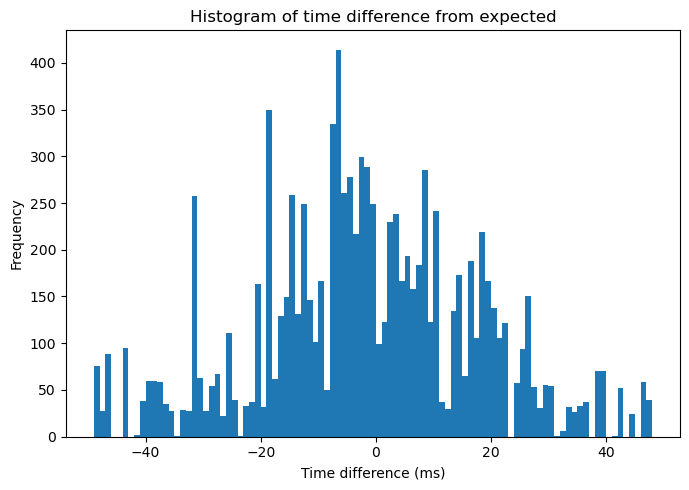

In [12]:
# also plot histogram
mean = np.mean(distribution_hist)
std = np.std(distribution_hist)
print("Distribution Mean:{:.2f}".format(mean))
print("Distribution Standad Deviation:{:.2f}".format(std))
plt.hist(distribution_hist,bins=int(max(distribution_hist)-min(distribution_hist)))
plt.title("Histogram of time difference from expected")
plt.xlabel("Time difference (ms)")
plt.ylabel("Frequency")
plt.show()

Distribution Mean:5.05
Distribution Standad Deviation:29.32


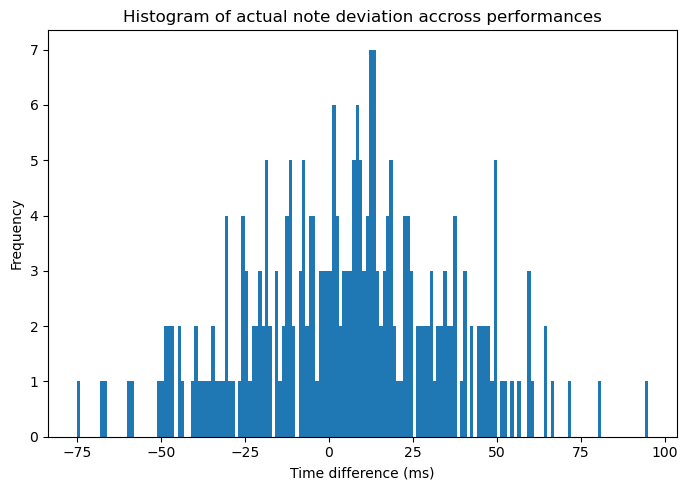

In [13]:
# Note distribution in first vs second playthrough

note_distribution_hist = []
for note in notes[time_to_index(notes,start):time_to_index(notes,end)]:
    # find closest note in history
    note2 = find_note(notes, note[0]-191400, note[1], max_time_dist = 100)
    if note2:
        note_distribution_hist.append(note[0]-notes[note2][0]-191400)
    
mean = np.mean(note_distribution_hist)
std = np.std(note_distribution_hist)
print("Distribution Mean:{:.2f}".format(mean))
print("Distribution Standad Deviation:{:.2f}".format(std))
plt.hist(note_distribution_hist,bins=int(max(note_distribution_hist)-min(note_distribution_hist)))
plt.title("Histogram of actual note deviation accross performances")
plt.xlabel("Time difference (ms)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#['source_timestamp', 'target_timestamp','score','source_id_start','source_id_end','target_id_start','target_id_end','match_len','match_time']
k = 1

# dtype = [('source_timestamp', float), ('target_timestamp', float), ('score', float),('source_id_start', float),\
#          ('source_id_end', float),('target_id_start', float),('target_id_end', float),('match_len', float),('match_time', float)]

close_matches_array = np.array(close_matches)
distribution_hist_array = np.array(distribution_hist)
print(close_matches_array.shape)
close_matches_df = pd.DataFrame(data = close_matches_array, columns=['source_timestamp', 'target_timestamp','score','source_id_start','source_id_end','target_id_start','target_id_end','match_len','match_time'])
close_matches_df['deviation'] = distribution_hist_array

close_matches_sorted = close_matches_df.sort_values(by=['deviation'])

worst_matches = np.array(close_matches_sorted.iloc[-k:],dtype=float)

print(close_matches_df.iloc[0])
print(worst_matches.shape)
print(worst_matches.astype(int))
for match in worst_matches:
    print(match.astype(int))
    source_start = int(match[0])
    target_start = int(match[1])
    score = match[2]
    source_id_start = int(match[3])
    source_id_end = int(match[4])
    target_id_start = int(match[5])
    target_id_end = int(match[6])
    match_len = int(match[7])
    match_time = int(match[8])
    
    # plot worst match (in terms of distance from expected timestamp)
    diff = source_start - target_start
    sequence1 = np.copy(notes[source_id_end:source_id_start+3])
    sequence1[:,0] = sequence1[:,0]-diff
    sequence2 = np.copy(notes[target_id_end:target_id_start+3])
    sequence2[:,0] = sequence2[:,0]
    sequence3 = sequence2.copy()
    sequence3[:,0] = sequence2[:,0]-diff+191400
    
    display_expected_actual(sequence1,sequence2,source_start,target_start,source_start-diff,target_start,source_start-191400,diff,score,match_time,l1="Source",l2="Matching Target",l3="Expected Target")
    display_expected_actual(sequence1,sequence3,source_start,target_start,source_start-191400,source_start-191400,target_start,diff,score,match_time,l1="Source",l2="Expected Target",l3="Matching Target")
    
    a = notes[source_id_start-2:source_id_start+3]
    b = notes[target_id_start-2:target_id_start+3]
    print("Source end notes:\n",a)
    print("Source end notes - 191400:",a[:,0] - 191400)
    print("Target end notes:\n",b)
    print("Source diff between notes:",a[1:,0] - a[:-1,0])
    print("Target diff between notes:",b[1:,0] - b[:-1,0])
    print("Source time - last note:",match[0]-notes[int(match[3])-1][0])
    print("Target time - last note:",match[1]-notes[int(match[5])-1][0])
    print()

In [ ]:
# Plotting diff vs source time

distribution_all_arr = np.array(distribution_all)
plt.plot(distribution_all_arr[:,0],distribution_all_arr[:,1])
plt.xlabel("Source Timestamp (ms)")
plt.ylabel("Target Timestamp Deviation from Expected (ms)")
plt.title("Plot showing time difference betweeen Best Match and Expected Match for every source time in second playthrough")
plt.show()

In [ ]:
# Plotting diff vs source time - within a range

source_time = 275000
index = (source_time - start)//skip
# index -= 1500
len_match = 500

# Getting match details near source time we're interested in
# Can use this to make display_snippet plots
# matches_near_source = np.array(close_matches_df.iloc[index:index+500])

distribution_all_arr = np.array(distribution_all)
plt.plot(distribution_all_arr[index:index+len_match,0],distribution_all_arr[index:index+len_match,1])
plt.xlabel("Source Timestamp (ms)")
plt.ylabel("Target Timestamp Deviation from Expected (ms)")
plt.title("Plot showing time difference betweeen Best Match and Expected Match")
plt.show()

In [ ]:
pop_a = mpatches.Patch(color='blue', label='Unexpected match')
pop_b = mpatches.Patch(color='orange', label='On the line match')

In [ ]:
# Plotting best match score 

plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams["figure.autolayout"] = True

count = 0
for x in curr_times:
    y = simsDFall.loc[simsDFall['source_timestamp'] == x]['score'].max()
    s = simsDFall.loc[(simsDFall['source_timestamp'] == x) & (simsDFall['score'] == y)]['match_len'].max()
#     print(s)
    if np.isnan(y):
        count += 1
        y = 0
    else:
        if (np.abs(simsDFall.loc[(simsDFall['source_timestamp'] == x) & (simsDFall['score'] == y) & (simsDFall['match_len'] == s)]['target_timestamp']-(x-191400))<100).any():
            color = 'orange'
        else:
            color = 'blue'
        plt.scatter(x,y,1,c=color) # need to include s (len of best match)

# currDF = simsDFall.copy()
# currDF.sort_values(['source_timestamp', 'score', 'match_len'], ascending=[True, False, False]).drop_duplicates(['source_timestamp']).reset_index(drop=True)
# plt.scatter(curr_times,currDF.loc[currDF['source_timestamp'] == curr_times]['score'],currDF.loc[currDF['source_timestamp'] == curr_times]['match_len'])
# scores = s.max(axis = 0)
# # if np.isnan(y):
# #     count += 1
# #     y = 0
    

print(count)
plt.title("Best match score for \nMin Snippet Length=" + str(minNotes) + " notes, Max Notes=" + str(maxNotes))
# plt.colorbar()
plt.xlabel("Source Timestamp (ms)")
plt.ylabel("Best Match Score")
plt.legend(handles=[pop_a,pop_b])
plt.show()

In [ ]:
# Plotting note length of best match  

plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams["figure.autolayout"] = True

count = 0
for x in range(start,end,skip):
    y = simsDFall.loc[simsDFall['source_timestamp'] == x]['score'].max()
    s = simsDFall.loc[(simsDFall['source_timestamp'] == x) & (simsDFall['score'] == y)]['match_len'].max()
#     print(s)
    if np.isnan(y):
        count += 1
        y = 0
    
    if (np.abs(simsDFall.loc[(simsDFall['source_timestamp'] == x) & (simsDFall['score'] == y) & (simsDFall['match_len'] == s)]['target_timestamp']-(x-191400))<100).any():
        color = 'orange'
    else:
        color = 'blue'
    plt.scatter(x,s,1,c=color)
    
# print(count)
plt.title("Best match length (in notes) for \nMin Snippet Length=" + str(minNotes) + " notes, Max Notes=" + str(maxNotes))
# plt.colorbar()
plt.xlabel("Source Timestamp (ms)")
plt.ylabel("Match Length (#notes)")
plt.legend(handles=[pop_a,pop_b])
plt.show()

In [ ]:
# Plotting time length of best match  

plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams["figure.autolayout"] = True

count = 0
for x in range(start,end,skip):
    y = simsDFall.loc[simsDFall['source_timestamp'] == x]['score'].max()
    s = simsDFall.loc[(simsDFall['source_timestamp'] == x) & (simsDFall['score'] == y)]['match_time'].max()
#     print(s)
    if np.isnan(y):
        count += 1
        y = 0
    if (np.abs(simsDFall.loc[(simsDFall['source_timestamp'] == x) & (simsDFall['score'] == y) & (simsDFall['match_time'] == s)]['target_timestamp']-(x-191400))<100).any():
        color = 'orange'
    else:
        color = 'blue'
    plt.scatter(x,s,1,c=color)
    
# print(count)
plt.title("Best match length (in time) for \nMin Snippet Length=" + str(minNotes) + " notes, Max Notes=" + str(maxNotes))
# plt.colorbar()
plt.xlabel("Source Timestamp (ms)")
plt.ylabel("Match Length (ms)")
plt.legend(handles=[pop_a,pop_b])
plt.show()